# Chicago Car Crashes Project

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
#loading the data
df = pd.read_csv('carcrash_cleaned_data')

In [3]:
#printing first 5 rows
df.head()

,Unnamed: 0,CRASH_DATE,POSTED_SPEED_LIMIT,LANE_CNT,SEVERE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,WORK_ZONE_I,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,TRAFFIC_CONTROL_DEVICE_DELINEATORS,TRAFFIC_CONTROL_DEVICE_LANE USE MARKING,TRAFFIC_CONTROL_DEVICE_NO CONTROLS,TRAFFIC_CONTROL_DEVICE_NO PASSING,TRAFFIC_CONTROL_DEVICE_OTHER REG. SIGN,TRAFFIC_CONTROL_DEVICE_OTHER WARNING SIGN,TRAFFIC_CONTROL_DEVICE_PEDESTRIAN CROSSING SIGN,TRAFFIC_CONTROL_DEVICE_POLICE/FLAGMAN,TRAFFIC_CONTROL_DEVICE_RAILROAD CROSSING GATE,TRAFFIC_CONTROL_DEVICE_RR CROSSING SIGN,TRAFFIC_CONTROL_DEVICE_SCHOOL ZONE,TRAFFIC_CONTROL_DEVICE_STOP SIGN/FALSHER,TRAFFIC_CONTROL_DEVICE_STOP SIGN/FLASHER,TRAFFIC_CONTROL_DEVICE_TRAFFIC SIGNAL,TRAFFIC_CONTROL_DEVICE_UNKNOWN/OTHER,TRAFFIC_CONTROL_DEVICE_YIELD,DEVICE_CONDITION_FUNCTIONING PROPERLY,DEVICE_CONDITION_MISSING,DEVICE_CONDITION_NO CONTROLS,DEVICE_CONDITION_NOT FUNCTIONING,DEVICE_CONDITION_OTHER,DEVICE_CONDITION_UNKNOWN,DEVICE_CONDITION_WORN REFLECTIVE MATERIAL,WEATHER_CONDITION_CLOUDY/OVERCAST,WEATHER_CONDITION_FOG/SMOKE/HAZE,WEATHER_CONDITION_RAIN,WEATHER_CONDITION_SLEET/HAIL,WEATHER_CONDITION_SNOW,WEATHER_CONDITION_UNKNOWN/OTHER,"LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD",LIGHTING_CONDITION_DAWN,...,ALIGNMENT_STRAIGHT ON HILLCREST,SEASON_Spring,SEASON_Summer,SEASON_Fall,ROAD_DEFECT_NO DEFECTS,"ROAD_DEFECT_RUT, HOLES",ROAD_DEFECT_SHOULDER DEFECT,ROAD_DEFECT_UNKNOWN/OTHER,ROAD_DEFECT_WORN SURFACE,"DAMAGE_$501 - $1,500","DAMAGE_OVER $1,500",PRIM_CONTRIBUTORY_CAUSE_BICYCLE ADVANCING LEGALLY ON RED LIGHT,PRIM_CONTRIBUTORY_CAUSE_CELL PHONE USE OTHER THAN TEXTING,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING OTHER TRAFFIC SIGNS,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING ROAD MARKINGS,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING STOP SIGN,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING TRAFFIC SIGNALS,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING YIELD SIGN,PRIM_CONTRIBUTORY_CAUSE_DISTRACTION - FROM INSIDE VEHICLE,PRIM_CONTRIBUTORY_CAUSE_DISTRACTION - FROM OUTSIDE VEHICLE,"PRIM_CONTRIBUTORY_CAUSE_DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)",PRIM_CONTRIBUTORY_CAUSE_DRIVING ON WRONG SIDE/WRONG WAY,PRIM_CONTRIBUTORY_CAUSE_DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,PRIM_CONTRIBUTORY_CAUSE_EQUIPMENT - VEHICLE CONDITION,"PRIM_CONTRIBUTORY_CAUSE_EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST",PRIM_CONTRIBUTORY_CAUSE_EXCEEDING AUTHORIZED SPEED LIMIT,PRIM_CONTRIBUTORY_CAUSE_EXCEEDING SAFE SPEED FOR CONDITIONS,PRIM_CONTRIBUTORY_CAUSE_FAILING TO REDUCE SPEED TO AVOID CRASH,PRIM_CONTRIBUTORY_CAUSE_FAILING TO YIELD RIGHT-OF-WAY,PRIM_CONTRIBUTORY_CAUSE_FOLLOWING TOO CLOSELY,PRIM_CONTRIBUTORY_CAUSE_HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE),PRIM_CONTRIBUTORY_CAUSE_IMPROPER BACKING,PRIM_CONTRIBUTORY_CAUSE_IMPROPER LANE USAGE,PRIM_CONTRIBUTORY_CAUSE_IMPROPER OVERTAKING/PASSING,PRIM_CONTRIBUTORY_CAUSE_IMPROPER TURNING/NO SIGNAL,PRIM_CONTRIBUTORY_CAUSE_MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT,PRIM_CONTRIBUTORY_CAUSE_NOT APPLICABLE,PRIM_CONTRIBUTORY_CAUSE_OBSTRUCTED CROSSWALKS,"PRIM_CONTRIBUTORY_CAUSE_OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER",PRIM_CONTRIBUTORY_CAUSE_PASSING STOPPED SCHOOL BUS,PRIM_CONTRIBUTORY_CAUSE_PHYSICAL CONDITION OF DRIVER,PRIM_CONTRIBUTORY_CAUSE_RELATED TO BUS STOP,PRIM_CONTRIBUTORY_CAUSE_ROAD CONSTRUCTION/MAINTENANCE,PRIM_CONTRIBUTORY_CAUSE_ROAD ENGINEERING/SURFACE/MARKING DEFECTS,PRIM_CONTRIBUTORY_CAUSE_TEXTING,PRIM_CONTRIBUTORY_CAUSE_TURNING RIGHT ON RED,PRIM_CONTRIBUTORY_CAUSE_UNABLE TO DETERMINE,PRIM_CONTRIBUTORY_CAUSE_UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED),"PRIM_CONTRIBUTORY_CAUSE_VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)",PRIM_CONTRIBUTORY_CAUSE_WEATHER
0,0,2019-07-10 17:56:00,35,0.0,0,0,0,0,0,2,0.0,0.0,0.0,0.0,0.0,3.0,17,4,7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,

In [4]:
#checking the shapeof dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475553 entries, 0 to 475552
Columns: 137 entries, Unnamed: 0 to PRIM_CONTRIBUTORY_CAUSE_WEATHER
dtypes: float64(7), int64(129), object(1)
memory usage: 497.1+ MB


In [5]:
#checking for the nullvalues 
df.isna().sum()

Unnamed: 0                                                                                    0
CRASH_DATE                                                                                    0
POSTED_SPEED_LIMIT                                                                            0
LANE_CNT                                                                                      0
SEVERE                                                                                        0
                                                                                             ..
PRIM_CONTRIBUTORY_CAUSE_TURNING RIGHT ON RED                                                  0
PRIM_CONTRIBUTORY_CAUSE_UNABLE TO DETERMINE                                                   0
PRIM_CONTRIBUTORY_CAUSE_UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)    0
PRIM_CONTRIBUTORY_CAUSE_VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)                  0
PRIM_CONTRIBUTORY_CAUSE_WEATHER         

In [6]:
#dropping the columns
df.drop(columns=['Unnamed: 0','CRASH_DATE'], axis = 1, inplace=True)

# Basic Model- Logistic Regression

In [7]:
#importing skitlearn modulus
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics

In [8]:
# Define X and y
y = df['SEVERE']
X = df.drop(columns=['SEVERE'], axis=1)

In [9]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(y_train.value_counts(),'\n\n', y_test.value_counts())

0    268616
1     88048
Name: SEVERE, dtype: int64 

 0    89717
1    29172
Name: SEVERE, dtype: int64


In [10]:
# Creating the classifier, fit it on the training data and make predictions on the test set
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e10)
logreg.fit(X_train, y_train)

C:\Users\vijay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10000000000.0)

In [11]:
logreg_results = logreg.predict(X_test)

In [12]:
print("f1 score Train:",metrics.f1_score(y_train, logreg.predict(X_train)))
print("f1 score  Test:",metrics.f1_score(y_test, logreg_results))

f1 score Train: 0.7525799110922946
f1 score  Test: 0.753723892815782


In [13]:
print("Accuracy :",metrics.accuracy_score(y_test, logreg_results))

Accuracy : 0.896256171723204


In [14]:
#printing classifiction report of logistic regression
print(classification_report(y_test, logreg_results))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     89717
           1       0.90      0.65      0.75     29172

    accuracy                           0.90    118889
   macro avg       0.90      0.81      0.84    118889
weighted avg       0.90      0.90      0.89    118889



In [15]:
#printing the confusion matrix of Logistic regression
print(confusion_matrix(y_test,logreg_results ))

[[87681  2036]
 [10298 18874]]


# SMOTE to handle class imbalance

Using SMOTE to handle the class imbalance in the dataframe as a imbalance of 
75%(non Severe(0))-25%(Severe(1)) of Target(SEVERE).

In [16]:
from imblearn.over_sampling import SMOTE

In [17]:
# Fit SMOTE to training data
sm = SMOTE(random_state=42)

In [18]:
#Resampling the X and y using SMOTE
X_resampled, y_resampled = sm.fit_resample(X_train, y_train) 

In [19]:
# Preview synthetic sample class distribution
print(y_resampled.value_counts()) 

1    268616
0    268616
Name: SEVERE, dtype: int64


In [20]:
# Split resampled data into training and test sets
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled, 
                                                                             y_resampled)

In [21]:
print(y_resampled_train.value_counts(),'\n\n', y_resampled_test.value_counts())

1    201612
0    201312
Name: SEVERE, dtype: int64 

 0    67304
1    67004
Name: SEVERE, dtype: int64


# Logistic with SMOTE class balanced

In [22]:
# Creating the logistic regression with resmapled datasets, fit it on the training data and make predictions on the test set
logreg.fit(X_resampled_train, y_resampled_train)

C:\Users\vijay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10000000000.0)

In [23]:
logreg_resampled_results = logreg.predict(X_resampled_test)

In [24]:
logreg_results_test = logreg.predict(X_test)

In [27]:
print("f1 score Train:",metrics.f1_score(y_resampled_train, logreg.predict(X_resampled_train)))
print("f1 score of resampled test:",metrics.f1_score(y_resampled_test, logreg_resampled_results))
print("f1 score Test :",metrics.f1_score(y_test, logreg_results_test))
print("Accuracy :",metrics.accuracy_score(y_test, logreg_results_test))

f1 score Train: 0.8876260125441202
f1 score of resampled test: 0.8879963347587049
f1 score Test : 0.7426463052167674
Accuracy : 0.8732767539469589


In [28]:
#printing calssifiction report of logistic regression resampled
print(classification_report(y_test, logreg_results_test))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     89717
           1       0.74      0.75      0.74     29172

    accuracy                           0.87    118889
   macro avg       0.83      0.83      0.83    118889
weighted avg       0.87      0.87      0.87    118889



In [29]:
#printing the confusion matrix of resampled logistic regression
print(confusion_matrix(y_test, logreg_results_test ))

[[82085  7632]
 [ 7434 21738]]


# Model : K-Nearest Neighbors

In [30]:
#importing the skitlearn module of KNN classifier
from sklearn.neighbors import KNeighborsClassifier

In [31]:
# Creating the KNN classifier, fit it on the training data and make predictions on the test set
knn_default = KNeighborsClassifier()

In [32]:
knn_default.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
knn_results= knn_default.predict(X_test)

In [32]:
print("f1 score Train:",metrics.f1_score(y_train, knn_default.predict(X_train)))
print("f1 score  Test:",metrics.f1_score(y_test, knn_results))
print("Accuracy :",metrics.accuracy_score(y_test, knn_results))

f1 score Train: 0.6831194471865746
f1 score  Test: 0.567458899213724
Accuracy : 0.8371253858641253


In [33]:
#Printing classification roport of KNN model 
print(classification_report(y_test, knn_results ))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90     89717
           1       0.81      0.44      0.57     29172

    accuracy                           0.84    118889
   macro avg       0.83      0.70      0.73    118889
weighted avg       0.83      0.84      0.82    118889



In [35]:
#Printing the Confusion matrix of KNN model
print(confusion_matrix(y_test, knn_results))

[[86823  2894]
 [16470 12702]]


# KNN with SMOTE Class balanced

In [38]:
# Creating the KNN resampled classifier, fit it on the training data and make predictions on the test set
knn_resampled = knn_default.fit(X_resampled_train, y_resampled_train)

In [39]:
knn_resampled_results = knn_resampled.predict(X_resampled_test)

In [40]:
knn_results_test = knn_resampled.predict(X_test)

In [43]:
print("f1 score Resampled Train:",metrics.f1_score(y_resampled_train, knn_resampled.predict(X_resampled_train)))
print("f1 score of resampled Test:",metrics.f1_score(y_resampled_test, knn_resampled_results))
print("f1 score Test :",metrics.f1_score(y_test, knn_results_test))
print("Accuracy :",metrics.accuracy_score(y_test, knn_results_test))

f1 score Resampled Train: 0.9120417849775936
f1 score of resampled Test: 0.8663049717112636
f1 score Test : 0.6001695551262629
Accuracy : 0.7580179831607634


In [44]:
#Printing Confusion matrix of KNN resampled
print(confusion_matrix(y_test, knn_results_test))

[[68528 21189]
 [ 7580 21592]]


In [45]:
#printing the classification report of KNN resampled
print(classification_report(y_test, knn_results_test ))

              precision    recall  f1-score   support

           0       0.90      0.76      0.83     89717
           1       0.50      0.74      0.60     29172

    accuracy                           0.76    118889
   macro avg       0.70      0.75      0.71    118889
weighted avg       0.80      0.76      0.77    118889



# Model : Decision Trees class weight balanced

In [46]:
#importing the sci-kitlearn modulus of decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [47]:
# Creating the Decision Tree classifier, fit it on the training data and make predictions on the test set
dtree_default = DecisionTreeClassifier(class_weight='balanced')


In [48]:
dtree_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

In [49]:
dtree_results= dtree_default.predict(X_test)

In [50]:
print("f1 score Train:",metrics.f1_score(y_train, dtree_default.predict(X_train)))
print("f1 score Test :",metrics.f1_score(y_test, dtree_results))
print("Accuracy :",metrics.accuracy_score(y_test, dtree_results))

f1 score Train: 0.99728159298651
f1 score Test : 0.6942630873848971
Accuracy : 0.8483543473323857


In [51]:
#Printing the confusion matrix of Decision Tree 
print(confusion_matrix(y_test, dtree_results))

[[80390  9327]
 [ 8702 20470]]


In [52]:
#Printing the classification report of Decision Tree 
print(classification_report(y_test, dtree_results))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     89717
           1       0.69      0.70      0.69     29172

    accuracy                           0.85    118889
   macro avg       0.79      0.80      0.80    118889
weighted avg       0.85      0.85      0.85    118889



# Decision Tree model using a Smote class balance

In [53]:
# Creating the Decision Tree with resampled data, fit it on the training data and make predictions on the test set
dtree_resampled = DecisionTreeClassifier()

In [54]:
dtree_resampled.fit(X_resampled_train, y_resampled_train)

DecisionTreeClassifier()

In [55]:
dtree_resampled_results =  dtree_resampled.predict(X_resampled_test)

In [56]:
dtree_test_results = dtree_resampled.predict(X_test)

In [58]:
print("f1 score Train:",metrics.f1_score(y_resampled_train, dtree_resampled.predict(X_resampled_train)))
print("f1 score of resampled Test :",metrics.f1_score(y_resampled_test, dtree_resampled_results))
print("f1 score Test:",metrics.f1_score(y_test, dtree_test_results))
print("Accuracy :",metrics.accuracy_score(y_test, dtree_test_results))

f1 score Train: 0.9990818858560794
f1 score of resampled Test : 0.8863936299627677
f1 score Test: 0.6813823639530531
Accuracy : 0.8353674435818285


In [59]:
#printing the confusion matrix of the Decision Tree resampled data
print(confusion_matrix(y_test, dtree_test_results))

[[78387 11330]
 [ 8243 20929]]


In [60]:
#Printing the classifiction report of Decision Tree  resampled data
print(classification_report(y_test, dtree_test_results))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89     89717
           1       0.65      0.72      0.68     29172

    accuracy                           0.84    118889
   macro avg       0.78      0.80      0.79    118889
weighted avg       0.84      0.84      0.84    118889



# Decision Tree with Grid Search

In [61]:
# Creating the Decision tree with Grid Search and reasmpled data
from sklearn.model_selection import GridSearchCV
dtree_param_grid = {
    'max_depth' : [ 7,9],
    'min_samples_leaf' : [2, 5],
    'min_samples_split' : [2, 5 ],
    'class_weight' : ['balanced']
}

In [62]:
dtree_grid = GridSearchCV(estimator= DecisionTreeClassifier(), 
                          param_grid=dtree_param_grid, scoring = 'recall')

In [63]:
dtree_grid.fit(X_resampled_train, y_resampled_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'], 'max_depth': [7, 9],
                         'min_samples_leaf': [2, 5],
                         'min_samples_split': [2, 5]},
             scoring='recall')

In [64]:
#printing the best parameters of the GridSearch Decision Tree model resampled data
dtree_grid.best_params_

{'class_weight': 'balanced',
 'max_depth': 9,
 'min_samples_leaf': 5,
 'min_samples_split': 5}

In [65]:
dtree_grid_res_resam_test = dtree_grid.predict(X_resampled_test)

In [66]:
dtree_grid_results_test = dtree_grid.predict(X_test)

In [67]:
print("f1 score Train:",metrics.f1_score(y_resampled_train, dtree_grid.predict(X_resampled_train)))
print("f1 score resampled Test: ",metrics.f1_score(y_resampled_test, dtree_grid_res_resam_test))
print("f1 score Test:",metrics.f1_score(y_test, dtree_grid_results_test))
print("Accuracy :",metrics.accuracy_score(y_test, dtree_grid_results_test))

f1 score Train: 0.8560192211670136
f1 score resampled Test:  0.8557782439851805
f1 score Test: 0.7040494628263597
Accuracy : 0.8373440772485259


In [68]:
#Printing the confusion Matrix of the GridSearch Decsion Tree resampled data
print(confusion_matrix(y_test, dtree_grid_results_test))

[[76549 13168]
 [ 6170 23002]]


In [69]:
#Printing the clssification matrix of GridSearch Decision Tree resampled data
print(classification_report(y_test, dtree_grid_results_test))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89     89717
           1       0.64      0.79      0.70     29172

    accuracy                           0.84    118889
   macro avg       0.78      0.82      0.80    118889
weighted avg       0.85      0.84      0.84    118889



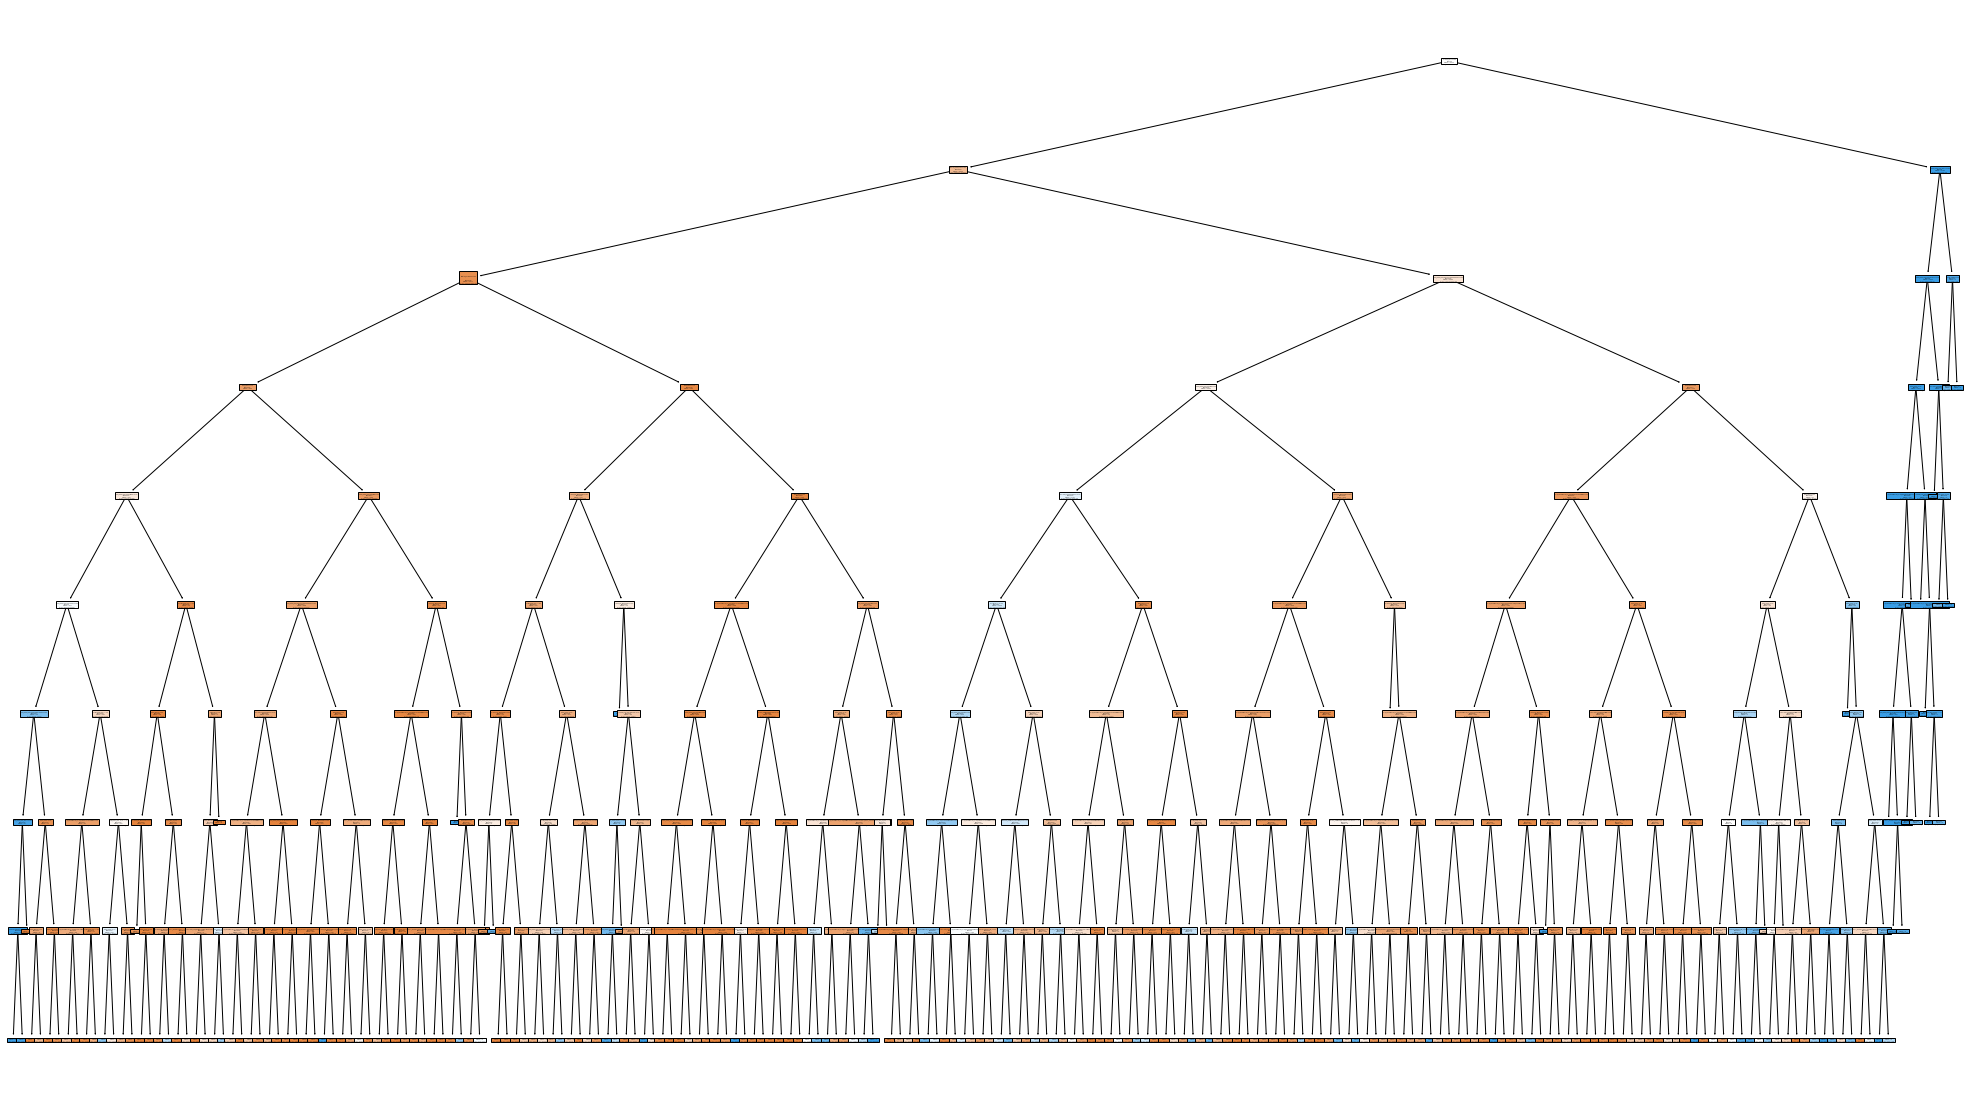

In [70]:
#Plotting the tree of GridSearch DecisionTree of resampled data
fig = plt.figure(figsize=(35,20))
_ = plot_tree(dtree_grid.best_estimator_, 
                   feature_names=X.columns,
                   filled=True)

# Random Forest 

In [71]:
#importing skitlearn module for Random Forest classifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [72]:
# Instantiate and fit a RandomForestClassifier
rfc= RandomForestClassifier(class_weight = 'balanced', n_estimators=100,
                            random_state = 42, max_depth= 5,)

In [73]:
rfc_default = rfc.fit(X_train, y_train)

In [74]:
rfc_results = rfc_default.predict(X_test)

In [75]:
print("f1 score Train:",metrics.f1_score(y_train, rfc_default.predict(X_train)))
print("f1 score Test: ",metrics.f1_score(y_test, rfc_results))
print("Accuracy :",metrics.accuracy_score(y_test, rfc_results))

f1 score Train: 0.7547479673785249
f1 score Test:  0.7599323435444465
Accuracy : 0.8925552406025788


In [76]:
#printing the confusion matrix of Random Forestof resampled data
print(confusion_matrix(y_test, rfc_results))

[[85897  3820]
 [ 8954 20218]]


In [77]:
#printing the classification report of Random Forest resanpled data
print(classification_report(y_test, rfc_results))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     89717
           1       0.84      0.69      0.76     29172

    accuracy                           0.89    118889
   macro avg       0.87      0.83      0.85    118889
weighted avg       0.89      0.89      0.89    118889



# Random Forest with SMOTE and class weight balanced

In [78]:
# Instantiate and fit a RandomForestClassifier
rfc= RandomForestClassifier(class_weight = 'balanced', n_estimators=100,
                            random_state = 42, max_depth= 5,)

In [79]:
rfc_resampled = rfc.fit(X_resampled_train, y_resampled_train)

In [80]:
rfc_resampled_results = rfc.predict(X_resampled_test)

In [81]:
rfc_results_test = rfc.predict(X_test)

In [82]:
print("f1 score Train:",metrics.f1_score(y_resampled_train, rfc.predict(X_resampled_train)))
print("f1 score resampled Test: ",metrics.f1_score(y_resampled_test, rfc_resampled_results))
print("f1 score of Test : ",metrics.f1_score(y_test,rfc_results_test))
print("Accuracy :",metrics.accuracy_score(y_test, rfc_results_test))

f1 score Train: 0.8142804618405789
f1 score resampled Test:  0.8130821065281771
f1 score of Test :  0.744755864568356
Accuracy : 0.8909991672904979


In [84]:
#printing the confusion matrix of Random Forestof resampled data
print(confusion_matrix(y_test, rfc_results_test))

[[87024  2693]
 [10266 18906]]


In [85]:
#printing the classification report of Random Forest resanpled data
print(classification_report(y_test, rfc_results_test))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     89717
           1       0.88      0.65      0.74     29172

    accuracy                           0.89    118889
   macro avg       0.88      0.81      0.84    118889
weighted avg       0.89      0.89      0.89    118889



# Random Forest with Grid Search

In [86]:
rfc_params = { 
    'n_estimators': [200,300],
    'max_depth': [3,7],
    'max_features': [0.6, 0.7],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']}

In [89]:
rfc_grid = GridSearchCV(estimator= RandomForestClassifier(), 
                          param_grid=rfc_params, scoring = 'recall')

In [90]:
rfc_grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'], 'max_depth': [3, 7],
                         'max_features': [0.6, 0.7],
                         'n_estimators': [200, 300]},
             scoring='recall')

In [91]:
#printing the best parameters of the GridSearch Decision Tree model resampled data
rfc_grid.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': 0.6,
 'n_estimators': 300}

In [92]:
rfc_grid_results = rfc_grid.predict(X_test)

In [93]:
print("f1 score Train:",metrics.f1_score(y_train, rfc_grid.predict(X_train)))
print("f1 score Test: ",metrics.f1_score(y_test, rfc_grid_results))
print("Accuracy :",metrics.accuracy_score(y_test, rfc_grid_results))

f1 score Train: 0.7381132962302244
f1 score Test:  0.7406368399838774
Accuracy : 0.8646889115056902


In [94]:
#printing the confusion matrix of Random Forestof resampled data
print(confusion_matrix(y_test, rfc_grid_results))

[[79833  9884]
 [ 6203 22969]]


In [95]:
#printing the classification report of Random Forest resanpled data
print(classification_report(y_test, rfc_grid_results))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     89717
           1       0.70      0.79      0.74     29172

    accuracy                           0.86    118889
   macro avg       0.81      0.84      0.82    118889
weighted avg       0.87      0.86      0.87    118889



#  Pipeline with StandardScaler and Logisitic Regression 

In [96]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [97]:
# Build a pipeline with StandardScaler and logistic Regression
logreg_pipeline = Pipeline([('ss', StandardScaler()),
                              ('LR', LogisticRegression(solver='liblinear', fit_intercept=False, random_state=42))])

In [98]:
logreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('LR',
                 LogisticRegression(fit_intercept=False, random_state=42,
                                    solver='liblinear'))])

In [99]:
logreg_pipeline_results =  logreg_pipeline.predict(X_test)

In [100]:
print("f1 score Train:",metrics.f1_score(y_train, logreg_pipeline.predict(X_train)))
print("f1 score Test: ",metrics.f1_score(y_test, logreg_pipeline_results))
print("Accuracy :",metrics.accuracy_score(y_test, logreg_pipeline_results))

f1 score Train: 0.7591065292096221
f1 score Test:  0.7610922862268289
Accuracy : 0.8991832717913347


In [101]:
print(confusion_matrix(y_test, logreg_pipeline_results))

[[87811  1906]
 [10080 19092]]


In [102]:
print(classification_report(y_test, logreg_pipeline_results))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     89717
           1       0.91      0.65      0.76     29172

    accuracy                           0.90    118889
   macro avg       0.90      0.82      0.85    118889
weighted avg       0.90      0.90      0.89    118889



# Feature Importance: Model Decision Tree(SMOTE class balance)

considering the model Decision Tree with SMOTE class balance feature importance since
Accuracy of the model is 89%

In [103]:
#printing the sorted feature ranking of Decision Tree resampled data
importances= dtree_resampled.feature_importances_
indices = np.argsort(importances)[::-1]
x_value =[]
y_value = []

for f in range(X_resampled.shape[1]):
    print(X_resampled.columns[indices[f]], "  -  ", importances[indices[f]])
    x_value.append( X_resampled.columns[indices[f]])
    y_value.append( importances[indices[f]])

INJURIES_TOTAL   -   0.38084295843766175
DAMAGE_OVER $1,500   -   0.077747057655628
CRASH_HOUR   -   0.052972890942562106
INJURIES_NO_INDICATION   -   0.03468802952131286
CRASH_MONTH   -   0.03257726209607747
CRASH_DAY_OF_WEEK   -   0.03153389547760695
FIRST_CRASH_TYPE_REAR END   -   0.02656716120645604
FIRST_CRASH_TYPE_SIDESWIPE SAME DIRECTION   -   0.019947122635838265
LANE_CNT   -   0.019922548253067975
TRAFFICWAY_TYPE_PARKING LOT   -   0.01911942452599343
POSTED_SPEED_LIMIT   -   0.01757728483772674
NUM_UNITS   -   0.017005386140318282
HIT_AND_RUN_I   -   0.01617866689774801
PRIM_CONTRIBUTORY_CAUSE_UNABLE TO DETERMINE   -   0.013547401657454173
PRIM_CONTRIBUTORY_CAUSE_IMPROPER BACKING   -   0.011029378402926381
FIRST_CRASH_TYPE_TURNING   -   0.010113618914525906
PRIM_CONTRIBUTORY_CAUSE_NOT APPLICABLE   -   0.008873413907983001
PRIM_CONTRIBUTORY_CAUSE_FAILING TO YIELD RIGHT-OF-WAY   -   0.007486597485725047
TRAFFICWAY_TYPE_NOT DIVIDED   -   0.007162951818575101
PRIM_CONTRIBUTORY_CAU

Text(0.5, 1.0, 'Top 15 Important Features')

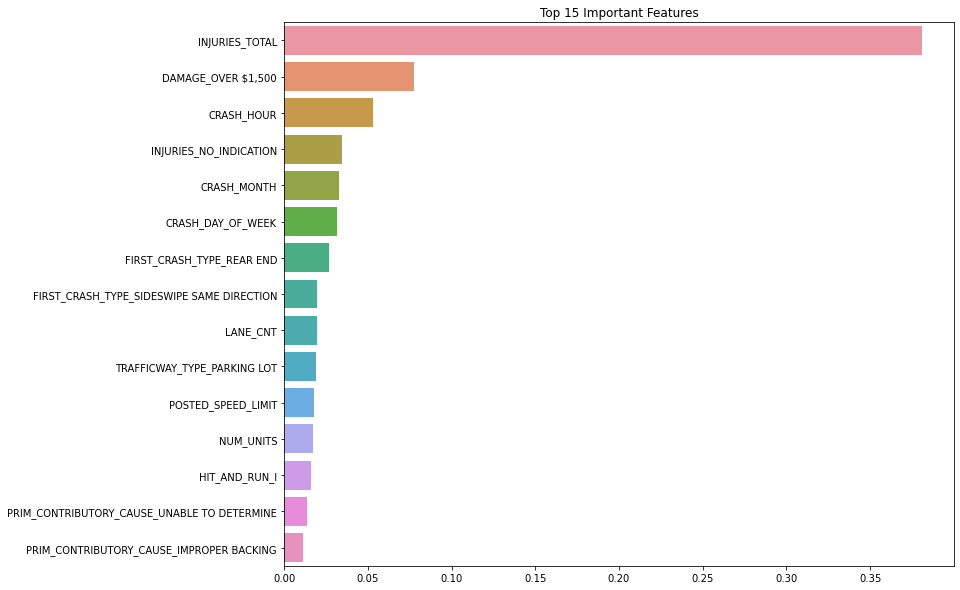

In [104]:
#plotting the top 15 important Features of the Decision Tree of resampled data
plt.figure(figsize = (12,10))
sns.barplot(y=x_value[:15], x=y_value[:15])
plt.title("Top 15 Important Features")


Looking at the graph, the severity of car crash can be determined by the features Injuries Total followed by Damage caused.

# Conclusion

Performed couple different models on the data. Ran Logistic Regression model as a basic model. Used SMOTE to handle class imbalance. Tried K Nearest Neighbors, Decision Tree, Random Forest, Grid search with different models and Pipeline with with StandardScaler and Logistic Regression.
Used Logistic Regression as our Final model. Table below as the scores of f1 train,f1 test and accuracy of all model performed.

| Model | Train f1 | Test f1  |Accuracy         
| :- |:------:|:------:| :-:
|Logistic Regression| 0.75|0.75| 0.90
|Logistic Regression(SMOTE) | 0.87|0.74 | 0.89
|KNearest Neighbors |0.68|0.57|0.84
|KNN (SMOTE) |0.91|0.60|0.86
|Decision Tree|1.0|0.69|0.85
|Decision Tree(SMOTE)|1.0|0.68|0.88
|Decision Tree with GridSearch|0.86|0.70|0.86
|Random Forest|0.75|0.76|0.89
|Random Forest(SMOTE)|0.80|0.74|0.83
|Random Forest with Gridsearch|0.74|0.74|0.87
|pipeline Logistic|0.76|0.76|0.90

[Text(0, 0.5, 'True'), Text(0.5, 0, 'Predicted')]

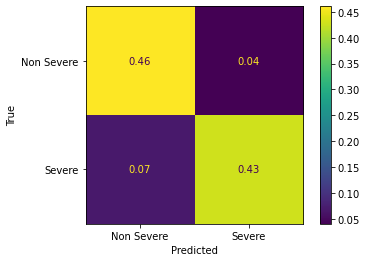

In [143]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_resampled_test, logreg_resampled_results, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['Non Severe','Severe'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')


Considering the model Logistic Regression with SMOTE class imbalance with a Accuracy of
89%. Precision and Recall score of this model looks balanced. Above the confusion matrix of the model
model test data, shows the predicted False Positive is 4% and False Negative 7%.
